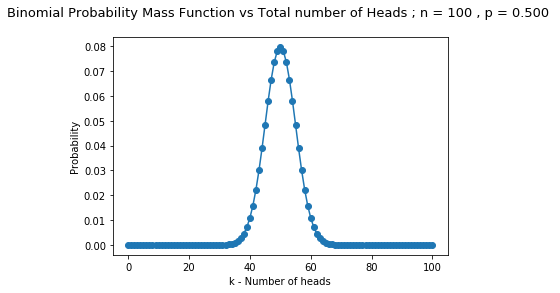

In [205]:
# inverse transformation method, Smirnov transform, golden rule
# is a basic method for pseudo-random number sampling

# probability integral transform

# A) for the Binomial distribution

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# 10k gives nice normal distribution from Y = F(k)
num = 100 # number of coins tossed
prob = 0.5 # probability of heads
k = np.arange(0, num+1) # total number of heads

# Probability Mass Function f(k) = Prob(X = k)
# Discrete version of probability density function (pdf) 
binomialPmf = binom.pmf(k, num, prob)

plt.plot(k, binomialPmf, 'o-')
plt.title("Binomial Probability Mass Function vs Total number of Heads ; n = %i , p = %.3f \n" % (num,prob), fontsize = 13)
plt.xlabel("k - Number of heads")
plt.ylabel("Probability")
plt.show()


49.99917
5.013064992527645


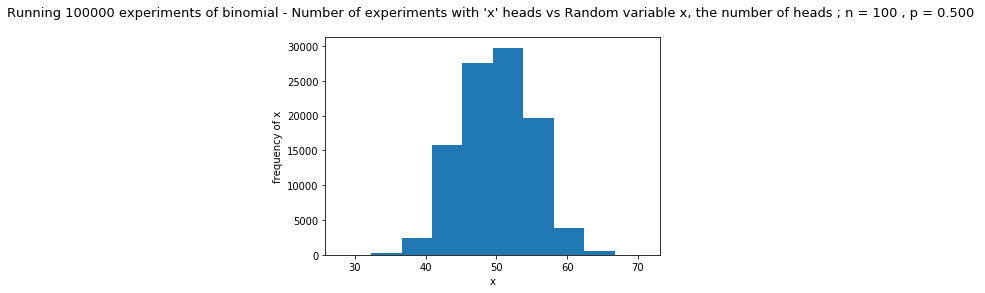

In [206]:
sim = 100000 # number of simulations
binNo = 10

binomial = binom.rvs(n = num, p = prob, size = sim) # an array of the results of 'sim' no of experiments

print(np.mean(binomial))
print(np.std(binomial, ddof = 1)) # Bessel's correction, i.e. the use of n − 1 for the sample variance 

plt.hist(binomial, bins = binNo)
plt.title("Running %i experiments of binomial - Number of experiments with 'x' heads vs Random variable x, the number of heads ; n = %i , p = %.3f \n" % (sim, num, prob), fontsize = 13)
plt.xlabel("x") # the random variable
plt.ylabel("frequency of x")
plt.show()

# Drawing 'sim' number of samples from the X probability distribution and it's Histogram

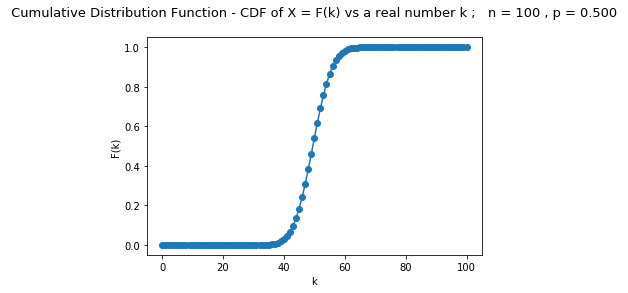

In [207]:
# The CDF of the binomial distribution R -> [0,1]
# F(k) is the (limiting) fraction of samples that lie below k OR how often do we see rv take on values below k? 
Cprob = binom.cdf(k, num, prob)

plt.plot(k, Cprob, 'o-')
plt.title(" Cumulative Distribution Function - CDF of X = F(k) vs a real number k ;   n = %i , p = %.3f \n" % (num,prob), fontsize = 13)
plt.xlabel("k") # the random variable
plt.ylabel("F(k)")
plt.show()

#print(Cprob)
# Cumulative Distribution Function

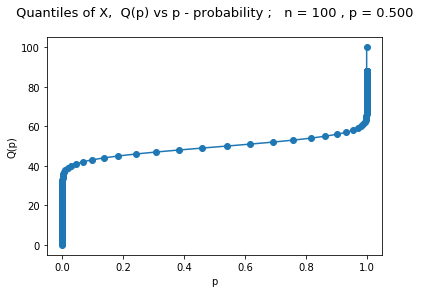

In [208]:
# F(k) or F_X(k) = Prob(X ≤ k) = int_{-infty}^{k} pdfX(t) dt = p
# F(k) = p or F-1(p) = k || NOTE that p belongs to [0,1]
# Q(p) = k The Quantile function
invC = binom.ppf(Cprob, num, prob) # percent point function
#print(invC) # Q(p) returns that random variable value 'k' such that Prob(X ≤ k) = p

plt.plot(Cprob, invC, 'o-')
plt.title(" Quantiles of X,  Q(p) vs p - probability ;   n = %i , p = %.3f \n" % (num,prob), fontsize = 13)
plt.xlabel("p") # the random variable
plt.ylabel("Q(p)")
plt.show()

# Note how Q(0.2) = 2 since F(2) = 0.2
# We get the probit function - the inverse of the CDF - The Quantile function of the Binomial distribution
#print(invC)
#print(Cprob)

In [209]:
# Now Inverse transform sampling says that I can turn y ~ U(0,1) into x ~ f(x)
# if I apply the transform F-1(y) = Q(y) = x

# Since binomial is discrete, 
uniform = np.random.uniform(0,1,sim)
#print(uniform)
#print(invC)
#print(Cprob)

# find cumulative probability p such that F(k-1) < y ≤ F(k) = p
def find_nearest(array, value):
    # Array is collection of cumulative probabilities - F
    # value is y and array[k] = F(k)
    # the infimum function is replaced by the minimum function, 
    # since the distribution function is right-continuous and weakly monotonically increasing.
    k = (np.abs(array - value)).argmin()
    if(array[k-1]<value and value<=array[k]):
        return k
    # value is closest to F(k) but is greater that it
    elif(array[k]<value and value <=array[k+1]):
        return k+1
    else:
        return 0 # value < array[0]
    
    
x = []
for y in uniform:
    # find the Q(y) using Cprob, what index and below contains y fraction of samples?
    x.append(find_nearest(Cprob,y))
#print(x)

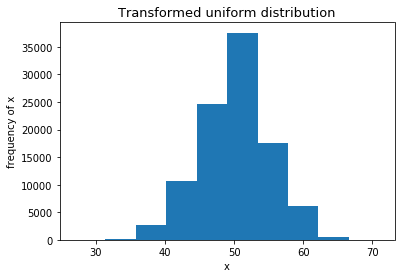

In [210]:
plt.hist(x, bins = binNo)
plt.title("Transformed uniform distribution", fontsize = 13)
plt.xlabel("x") # the random variable
plt.ylabel("frequency of x")
plt.show()

# BOOM and thus we converted the Uniform samples drawn into samples from a Binomial distribution

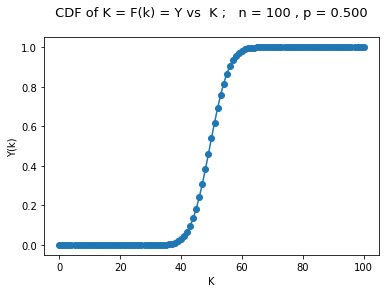

In [211]:
# Let us now convert binomial samples drawn into uniformly distributed samples

# Let us observe the SAME probability distribution under a change of variables, 
# till now we saw how it looks like if we index outcomes with K, now let us try Y = F(K)

plt.plot(k, Cprob, 'o-')
plt.title(" CDF of K = F(k) = Y vs  K ;   n = %i , p = %.3f \n" % (num,prob), fontsize = 13)
plt.xlabel("K") # the random variable
plt.ylabel("Y(k)")
plt.show()

# The below graph shows the relation between K and Y

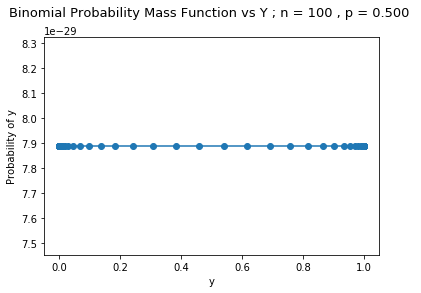

In [212]:
# The pmf of y is f(F-1(y)) vs y
Ypmf = []
for y in Cprob:
    Ypmf.append(binomialPmf[find_nearest(invC,y)])
    
plt.plot(Cprob, Ypmf, 'o-')
plt.title("Binomial Probability Mass Function vs Y ; n = %i , p = %.3f \n" % (num,prob), fontsize = 13)
plt.xlabel("y")
plt.ylabel("Probability of y")
plt.show()

# TO FIX and ALSO TO DO CDF wrt to new rv - y

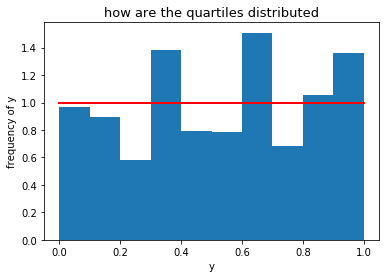

0.08345360789445584
0.5279438653168328


In [213]:
y = []

# using y = F(x) transform the data samples drawn from X 
for x in binomial:
    y.append(Cprob[x])
    
count, bins, ignored = plt.hist(y, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.title("how are the quartiles distributed", fontsize = 13)
plt.xlabel("y") # the random variable
plt.ylabel("frequency of y")
plt.show()

print(np.var(y))
print(np.mean(y))

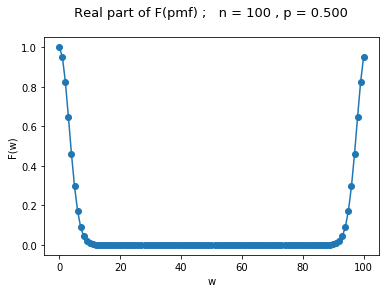

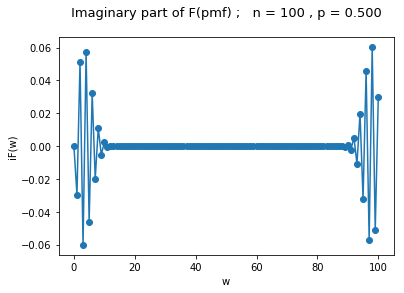

In [214]:
# Since we went this far, let me plot the final alternative way of describing a probability distribution
# other than pmf, cdf, quantiles, we have the Characteristic function


%matplotlib inline
import matplotlib.pyplot as plt
import scipy.fftpack

Cfun = np.fft.fft(binomialPmf)

plt.plot(k, abs(Cfun), 'o-')
plt.title(" Real part of F(pmf) ;   n = %i , p = %.3f \n" % (num,prob), fontsize = 13)
plt.xlabel("w") # the random variable
plt.ylabel("F(w)")
plt.show()


yf = scipy.fftpack.fft(binomialPmf)


plt.plot(k, np.imag(yf), 'o-')
plt.title(" Imaginary part of F(pmf) ;   n = %i , p = %.3f \n" % (num,prob), fontsize = 13)
plt.xlabel("w") # the random variable
plt.ylabel("iF(w)")
plt.show()